In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd 


In [2]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

cd_df = pd.read_csv(city_data_to_load)
rd_df = pd.read_csv(ride_data_to_load)
rd_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344


In [3]:
cd_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [4]:
print(cd_df.info())
print(rd_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   city          120 non-null    object
 1   driver_count  120 non-null    int64 
 2   type          120 non-null    object
dtypes: int64(1), object(2)
memory usage: 2.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2375 entries, 0 to 2374
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   city     2375 non-null   object 
 1   date     2375 non-null   object 
 2   fare     2375 non-null   float64
 3   ride_id  2375 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 74.3+ KB
None


In [5]:
cd_df.type.unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [6]:
print(f'Urban = {sum(cd_df.type=="Urban")}')
print(f'Suburban = {sum(cd_df.type=="Suburban")}')
print(f'Rural = {sum(cd_df.type=="Rural")}')

Urban = 66
Suburban = 36
Rural = 18


In [9]:
pyber_data_df = pd.merge(rd_df, cd_df, how="left", on=["city", "city"])
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [11]:
pyber_data_df.describe()

,fare,ride_id,driver_count
count,2375.000000,2.375000e+03,2375.000000
mean,26.753112,4.887270e+12,28.930105
std,12.109465,2.907361e+12,20.666306
min,4.050000,3.218337e+08,1.000000
25%,17.190000,2.381175e+12,11.000000
50%,26.600000,4.748541e+12,23.000000
75%,36.645000,7.461936e+12,45.000000
max,58.550000,9.991538e+12,73.000000


In [18]:
# Create the unique city DataFrames.
urban_df = pyber_data_df[pyber_data_df["type"] == "Urban"].reset_index(drop=True)
suburb_df = pyber_data_df[pyber_data_df["type"] == "Suburban"].reset_index(drop=True)
rural_df = pyber_data_df[pyber_data_df["type"] == "Rural"].reset_index(drop=True)
rural_df.head()

,city,date,fare,ride_id,driver_count,type
0,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
1,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
3,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
4,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [21]:
urban_ride_count = urban_df.groupby(['city']).count()['ride_id']
suburban_ride_count = suburb_df.groupby(['city']).count()['ride_id']
rural_ride_count = rural_df.groupby(['city']).count()['ride_id']
rural_ride_count.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

In [26]:
urban_fare = urban_df.groupby(['city']).mean()['fare']
suburb_fare = suburb_df.groupby(['city']).mean()['fare']
rural_fare = rural_df.groupby(['city']).mean()['fare']
print(urban_fare.head())
print(suburb_fare.head())
print(rural_fare.head())

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64
city
Barronchester    36.422500
Bethanyland      32.956111
Brandonfort      35.437368
Colemanland      30.894545
Davidfurt        31.995882
Name: fare, dtype: float64
city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64


In [33]:
urban_driver= urban_df.groupby(['city']).mean()['driver_count']
suburb_driver = suburb_df.groupby(['city']).mean()['driver_count']
rural_driver = rural_df.groupby(['city']).mean()['driver_count']
print(f'Average Urban Driver: \n{suburb_driver.head()}')
print(suburb_driver.head())
print(rural_driver.head())

Average Urban Driver: 
city
Barronchester    11.0
Bethanyland      22.0
Brandonfort      10.0
Colemanland      23.0
Davidfurt        23.0
Name: driver_count, dtype: float64
city
Barronchester    11.0
Bethanyland      22.0
Brandonfort      10.0
Colemanland      23.0
Davidfurt        23.0
Name: driver_count, dtype: float64
city
Bradshawfurt      7.0
Garzaport         7.0
Harringtonfort    4.0
Jessicaport       1.0
Lake Jamie        4.0
Name: driver_count, dtype: float64


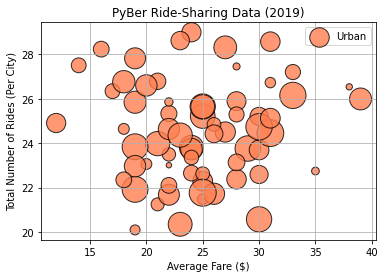

In [48]:
plt.scatter(urban_ride_count, 
    urban_fare, 
    s=urban_driver*10,
    edgecolors='black', linewidths=1,
    c="coral",
    alpha=.8,
    label="Urban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.xlabel("Average Fare ($)")
plt.ylabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()

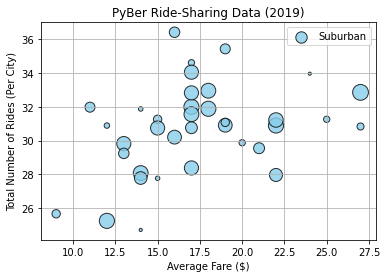

In [49]:
plt.scatter(suburban_ride_count, 
    suburb_fare, 
    s=suburb_driver*10,
    edgecolors='black', linewidths=1,
    c="skyblue",
    alpha=.8,
    label="Suburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.xlabel("Average Fare ($)")
plt.ylabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()

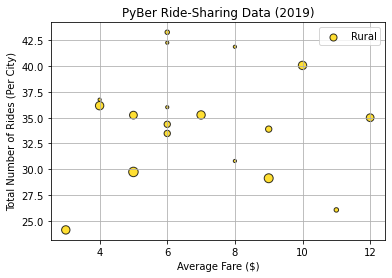

In [50]:
plt.scatter(rural_ride_count, 
    rural_fare, 
    s=rural_driver*10,
    edgecolors='black', linewidths=1,
    c="gold",
    alpha=.8,
    label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.xlabel("Average Fare ($)")
plt.ylabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()

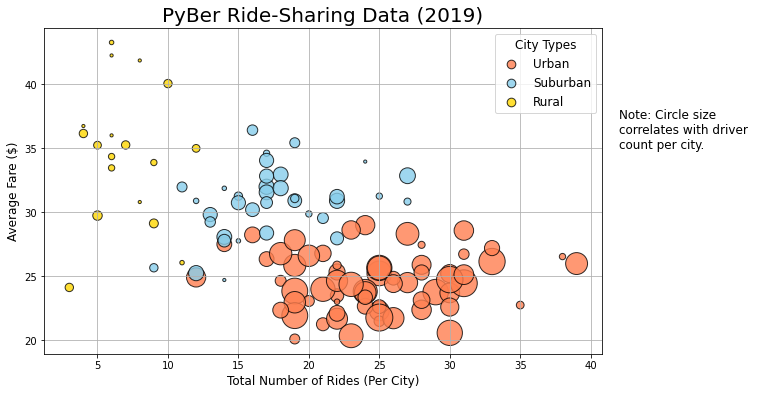

<Figure size 432x288 with 0 Axes>

In [60]:
plt.subplots(figsize=(10, 6))
plt.scatter(urban_ride_count, 
    urban_fare, 
    s=urban_driver*10,
    edgecolors='black', linewidths=1,
    c="coral",
    alpha=.8,
    label="Urban")

plt.scatter(suburban_ride_count, 
    suburb_fare, 
    s=suburb_driver*10,
    edgecolors='black', linewidths=1,
    c="skyblue",
    alpha=.8,
    label="Suburban")

plt.scatter(rural_ride_count, 
    rural_fare, 
    s=rural_driver*10,
    edgecolors='black', linewidths=1,
    c="gold",
    alpha=.8,
    label="Rural")

# Incorporate the other graph properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)
# Incorporate a text label about circle size.
plt.text(42, 35, "Note: Circle size \ncorrelates with driver \ncount per city.", fontsize="12")
# Show the plot
plt.show()
# Save the figure.
plt.savefig("analysis/Fig1.png")

In [36]:
#print(f'Urban mean fare = {pyber_data_df.groupby(['type']).mean()['fare']}')
#print(f'Suburban mean fare= {sum(cd_df.type=="Suburban")}')
#print(f'Rural mean fare = {sum(cd_df.type=="Rural")}')


SyntaxError: invalid syntax (3626662495.py, line 1)